# Diamond fitting
This Notebook will give a basic introduction to peak fitting using the Diamond fitting scripts.
Some example peak files can be found in the exaxmple files folder and will be used here to demonstrate the varius functions of the scripts.

#### Import packages

Here we import the various libraries used by the fitting.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import diamond_functions

In [2]:
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
plt.rc('legend',fontsize=20)
plt.rc('axes',linewidth=2)
plt.rc('xtick.major',width=2,size=10)
plt.rc('xtick.minor', width=2, size=5)
plt.rc('ytick.major',width=2,size=10)
plt.rc('ytick.minor',width=2,size=5)

## Analyse a single image file

We start by analysing a single file which contains a single spectrum. Initally we aim to make fits to one peak at a time.

First we define the path to the file to be analysed:

In [2]:
file_path = 'example_data/adc_041_7Nb_NDload_700C_15mms_00001.dat'

To do fitting, the data must be loaded into a FitCake instance

Note that in Dawn, the right hand side of the diffraction image is defined as 0 degrees and this number increases clockwise. This means that, column 1 is the right hand cake at -5 to 5 deg if using 10 deg slices i.e. in Dawn (-5,355).
Column 0 is the two-theta data in the file.

In [3]:
image_1 = diamond_functions.FitCake(file_path, cake=1)

The data from the file has been loaded into the FitCake object. We can then use the `plot_spectrum` method to plot the entire spectrum:

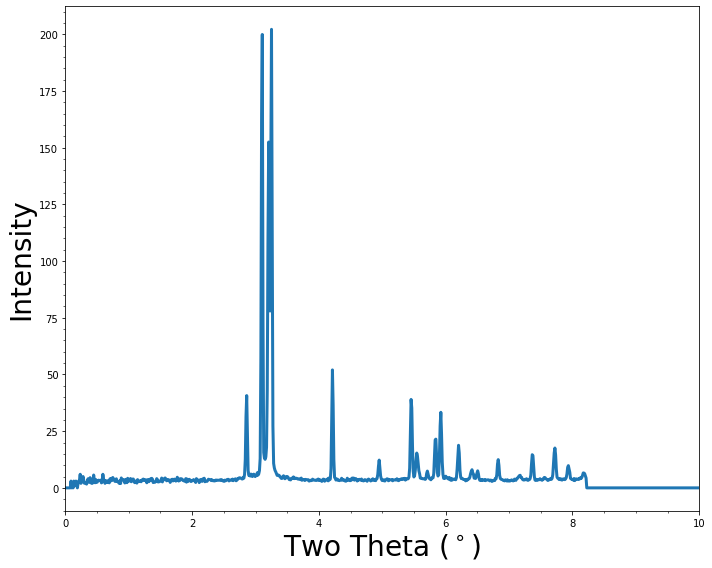

In [4]:
image_1.plot_spectrum()

If you are using the matplotlib notebook interactive backend then it should be possible to zoom and pan the graph directly.
If you are using a non-interactive backend then you can specify the x-axis limits by passing these to the `plot_spectrum` 
method.

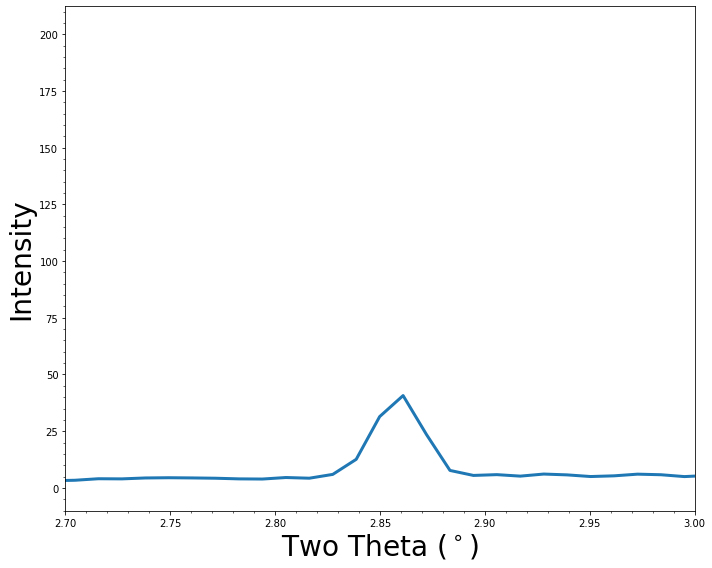

In [5]:
image_1.plot_spectrum(2.7, 3)

### Fitting a single peak

To begin a fit, define the peak bounds and labels. The peak bounds are just rough starting values and the fitting will iterate them to improve the fit.

In [8]:
peak_bounds = [(2.8, 2.9)]
peak_labels = ['(10-10)']

The method `fit_peaks` fits the specified peaks.

In [9]:
image_1.fit_peaks(peak_labels, peak_bounds)

The results of the fit are stored in the FitCake object. The fit parameters can be viewed by specifying the name of the fitted peak.

In [11]:
image_1.fits_dict['(10-10)'].values

{'amplitude': 1.061866871825472,
 'center': 2.858854414327404,
 'sigma': 0.013547487045287378,
 'fraction': 2.5368681599857723e-09,
 'fwhm': 0.027094974090574757,
 'height': 36.81706135826525,
 'constBG': 4.493745094207469}

This is just a Python dictionary so individaul values can be subscripted as normal, for example the peak centre is:

In [14]:
image_1.fits_dict['(10-10)'].values['center']

2.858854414327404

Full details on the fit can be seen by querying the dictionary object dirrectly.

In [28]:
image_1.fits_dict['(10-10)']

There is also a method for plotting the fit:

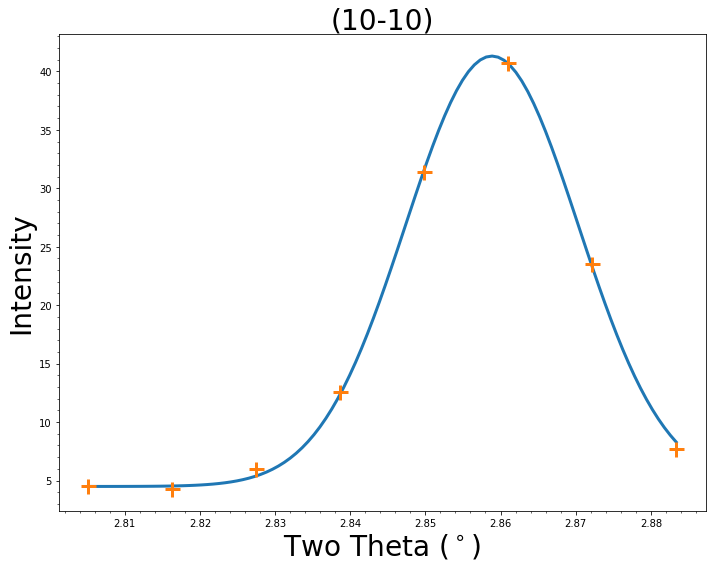

In [16]:
image_1.plot_fit('(10-10)')

### Fitting multiple peaks simultaneously

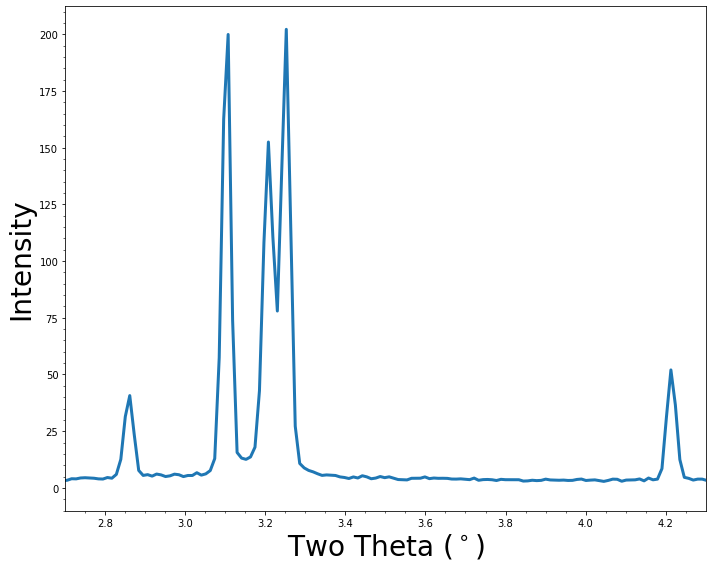

In [21]:
image_1.plot_spectrum(2.7, 4.3)

By providing multiple bounds we can fit multiple peaks simultanouesly.

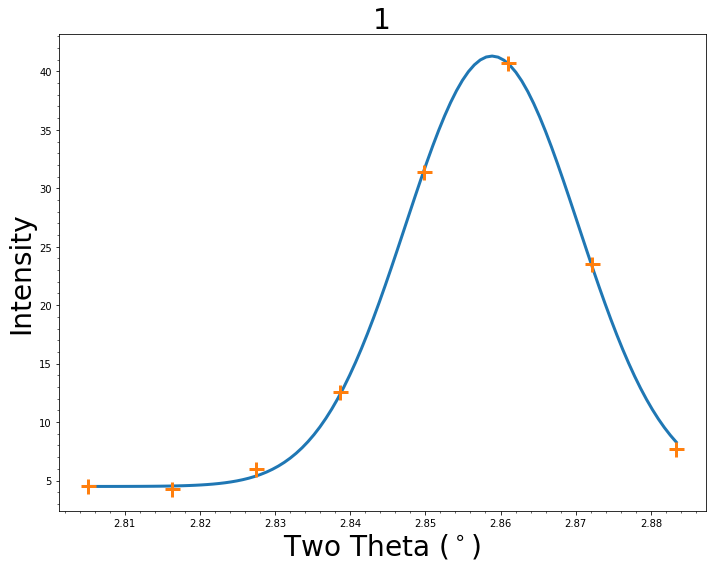

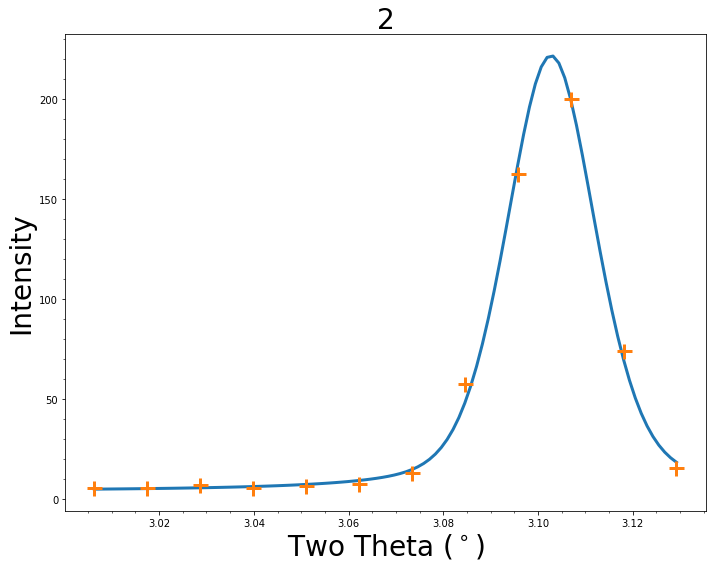

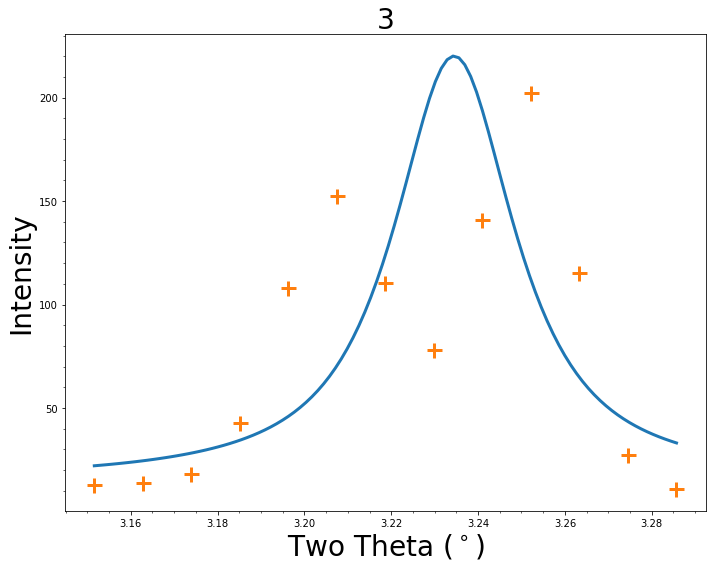

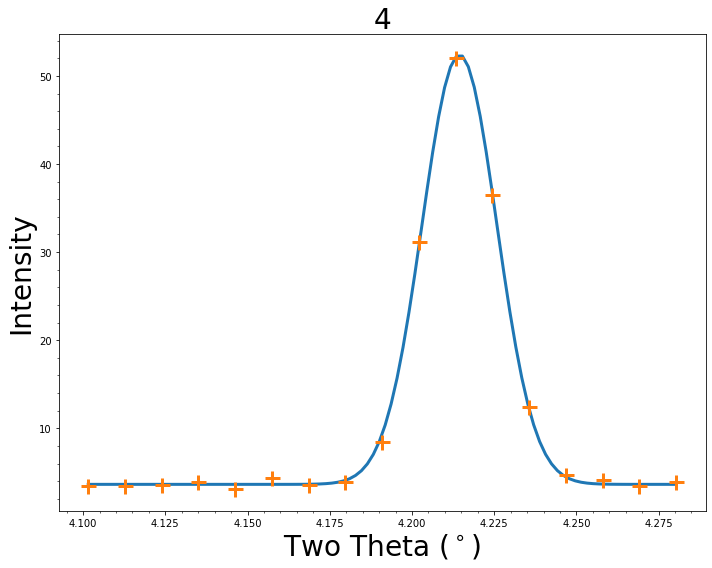

In [36]:
peak_bounds = [(2.8, 2.9), (3.0, 3.15), (3.15, 3.3), (4.1, 4.3)]
peak_labels = ['1', '2', '3', '4']
image_1.fit_peaks(peak_labels, peak_bounds)
image_1.plot_fit('1')
image_1.plot_fit('2')
image_1.plot_fit('3')
image_1.plot_fit('4')

Note that the third peak is a double peak and is fitted very poorly. This is becuase the `fit_peaks` 
function only fits single peaks. Later we will see how to fit double or triple peaks with a slightly different 
model fit.

## Run through all 'images'

Fit the peaks without passing initial parameters.

Note, options are 'normal' or 'bottom', 'top', 'vertical', 'horizontal' for merged cake points (merged intensity points not currently included).

In [ ]:
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'normal', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'bottom', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'top', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'vertical', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'horizontal', step=1, cake=1)

fits=run_thru_images(filePrefix, dirname, 1, 10, peak_bounds_initial, peak_labels_initial, 'vertical', step=1, cake=1)

We could also pass on the initial parameters in the fittings, but this can lead to errors during the run:

In [ ]:
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'normal', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'bottom', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'top', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'vertical', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'horizontal', step=1, cake=1)

fits=run_thru_images_initParams(filePrefix, dirname, 1, 10, peak_bounds_initial, peak_labels_initial, 'vertical','one', step=1, cake=1)

This creates a dictionary with all the class objects contaiing the fits:

In [ ]:
print(fits)

In [ ]:
fits.keys()

### Still confused about where our fitted data is???

Dictionary called fits contains keys (with the image name/number) and a FitCake class object for each key. 
The FitCake class object then contains;

- a list of the reflections (reflection_list)
- a dictionary containing the data (2-theta and intensity) for each of the reflections (data_dict)
- a dictionary containing the fitted line to the data, 100x 2-theta and intensity points, for each of the relections (lines_dict)
- a dictionary containing the class object from the lmfit model for each of the reflections (fits_dict)

In [ ]:
fit_number='_00001'
fit_string=filePrefix+fit_number

# print(fits)
# print(fits[fit_string])
# print(fits[fit_string].reflection_list)
# print(fits[fit_string].data_dict)
# print(fits[fit_string].lines_dict)
print(fits[fit_string].fits_dict)

The lmfit model class object contains a dictionary of parameters, such as peak center, fwhm, etc.

In [ ]:
# print(fits[fit_string].fits_dict['(10-10)'].params)
# print(fits[fit_string].fits_dict['(10-10)'].params['sigma'])
print(fits[fit_string].fits_dict['(10-10)'].values)

## Fit overlapping peaks

Define directory and filename:

In [ ]:
dirname=dataFolder+filePrefix+dataNameExtension
fname=filePrefix + '_00001.dat'

Define different directory and filename if analysing merged data:

In [ ]:
dirname=dataFolder+filePrefix+dataNameExtension+'/Merge/'
#fname=filePrefix + '_MergeCakePoints1+2+3_00001.dat'
# fname=filePrefix + '_MergeCakePoints_bottom_00001.dat'
# fname=filePrefix + '_MergeCakePoints_top_00001.dat'
# fname=filePrefix + '_MergeCakePoints_vertical_00001.dat'
# fname=filePrefix + '_MergeCakePoints_horizontal_00001.dat'
fname=filePrefix + '_MergeCakePoints_vertical_00001.dat'

Create a Fit2Peak or Fit3Peak instance (different class for fitting overlapping peaks):

In [ ]:
image_1=Fit2Peak(dirname,fname,cake=1)

In [ ]:
image_1=Fit3Peak(dirname,fname,cake=1)

Use the spectrum in the object and the plot_spectrum function to plot the entire spectrum:

In [ ]:
image_1.plot_spectrum(6.62,7.1)

# image_1.plot_spectrum(2.6,3.6) #10-10, 0002, 110, 10-11 (fit 0002 and 10-11 as double peaks)
# image_1.plot_spectrum(4.0,4.4) #10-12
# image_1.plot_spectrum(4.0,5.1) #200
# image_1.plot_spectrum(4.7,5.2) #11-20
# image_1.plot_spectrum(5.25,6.1) #10-13, 211, 20-20, 11-22, 20-21 (fit 11-22 and 20-21 as double peaks)
# # and also fit 10-13 and 211 as double peaks.

Define peak bounds (in this case covering the 3 overlapping peaks for the entire thermo-mechanical cycle) and labels of the overlapping peaks as a single string:

In [ ]:
peak_bounds_initial = [(3.0, 3.5)]
peak_labels_initial = ['(0002),(110),(10-11)']
#starting centres for the function fit_two_peaks are 3.42, 3.54, 3.59

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
pv_1_cent=3.09
pv_1_min=3.05
pv_1_max=3.11

pv_2_cent=3.205
pv_2_min=3.13
pv_2_max=3.21

pv_3_cent=3.25
pv_3_min=3.222
pv_3_max=3.28

In [ ]:
peak_bounds_initial = [(3.0, 3.5)]
peak_labels_initial = ['(110),(10-11)']
#starting centres for the function fit_two_peaks are 3.42, 3.54, 3.59

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
# pv_1_cent=3.205
# pv_1_min=3.15
# pv_1_max=3.205

# pv_2_cent=3.25
# pv_2_min=3.222
# pv_2_max=3.28

pv_1_cent=3.205
pv_1_min=3.13
pv_1_max=3.21

pv_2_cent=3.25
pv_2_min=3.222
pv_2_max=3.28

In [ ]:
peak_bounds_initial = [(6.15, 6.71)]
peak_labels_initial = ['(11-22),(20-21)']
#starting centres for the function fit_two_peaks are 6.45, 6.54

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
# pv_1_cent=6.32
# pv_1_min=6.30
# pv_1_max=6.47

# pv_2_cent=6.47
# pv_2_min=6.46
# pv_2_max=6.56

pv_1_cent=6.41
pv_1_min=6.28
pv_1_max=6.47

pv_2_cent=6.50
pv_2_min=6.43
pv_2_max=6.56

In [ ]:
peak_bounds_initial = [(6.62, 7.10)]
peak_labels_initial = ['(0004),(220)']
#starting image is around 1700 
#starting centres for the function fit_two_peaks are 6.78, 6.94

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
pv_1_cent=6.75
pv_1_min=6.37
pv_1_max=6.85

pv_2_cent=6.92
pv_2_min=6.86
pv_2_max=7.02

In [ ]:
peak_bounds_initial = [(5.2, 5.63)]
peak_labels_initial = ['(10-13),(211)']
#starting image is around 1700 
#starting centres for the function fit_two_peaks are 6.78, 6.94

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
pv_1_cent=5.45
pv_1_min=5.35
pv_1_max=5.47

pv_2_cent=5.55
pv_2_min=5.46
pv_2_max=5.56

The method `fit_2_peaks` or `fit_3_peaks` now fits three overlapping peaks:

In [ ]:
image_1.fit_2_peaks(peak_labels_initial, peak_bounds_initial, 
                    pv_1_cent, pv_1_min, pv_1_max,
                    pv_2_cent, pv_2_min, pv_2_max)

In [ ]:
image_1.fit_3_peaks(peak_labels_initial, peak_bounds_initial, 
                    pv_1_cent, pv_1_min, pv_1_max,
                    pv_2_cent, pv_2_min, pv_2_max,
                    pv_3_cent, pv_3_min, pv_3_max)

Results for the fit to all three peaks can be looked up:

In [ ]:
# image_1.fits_dict['(11-22),(20-21)'].values
# image_1.fits_dict['(10-13),(211)'].values
image_1.fits_dict['(0002),(110),(10-11)'].values

Now, the peak centre of each peak is additionally labelled pv_1, pv_2 and pv_3:

In [ ]:
print('peak centres...')
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_1center'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_2center'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_3center'])

print('peak sigmas...')
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_1sigma'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_2sigma'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_3sigma'])

The three peak fit can also be plotted:

In [ ]:
image_1.plot_fit('(0002),(110),(10-11)')
# image_1.plot_fit('(110),(10-11)')
# image_1.plot_fit('(11-22),(20-21)')
# image_1.plot_fit('(10-13),(211)')
# image_1.plot_fit('(0004),(220)')

### Run through all images with overlapping peaks

With fitting 2 or 3 overlapping peaks, choose a two-theta range which covers the peaks over the entire thermomechanical cycle. Currrently, peak bounds aren't adjusted within the loop in this case.

The initial parameters need to be passed in this case, so that the pseudo-voigt fit correctly identifies the three peaks each time.

Fitting 2 peaks:

In [ ]:
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'normal','two', step=1, cake=1,)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'bottom','two', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'top','two', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'vertical','two', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'horizontal','two', step=1, cake=1)

fits=run_thru_images_initParams(filePrefix,dirname, 1, 10, peak_bounds_initial, peak_labels_initial, 'vertical','two', 
                                pv_1_cent, pv_1_min, pv_1_max,
                                pv_2_cent, pv_2_min, pv_2_max,
                                step=1, cake=1)


Fitting 3 peaks:

In [ ]:
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'normal','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'bottom','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'top','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'vertical','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'horizontal','three', step=1, cake=1)

fits=run_thru_images_initParams(filePrefix,dirname, 1, 10, peak_bounds_initial, peak_labels_initial, 'vertical','three', 
                                pv_1_cent, pv_1_min, pv_1_max,
                                pv_2_cent, pv_2_min, pv_2_max,
                                pv_3_cent, pv_3_min, pv_3_max,
                                step=1, cake=1)

## Check the fitting data

We can then easily plot the fits for each reflection:

In [ ]:
fit_number='_00001'
fit_string=filePrefix+fit_number

fit=fits[fit_string]
# '(10-10)', '(10-12)', '(200)', '(11-20)', '(10-13)'
# fit.plot_fit('(200)')
# fit.plot_fit('(10-12)')

fit.plot_fit('(0002),(110),(10-11)')
# fit.plot_fit('(110),(10-11)')
# fit.plot_fit('(11-22),(20-21)')
# fit.plot_fit('(10-13),(211)')
# fit.plot_fit('(211)')
# fit.plot_fit('(0004),(220)')


# fit.fits_dict['(11-22),(20-21)'].values
# fit.fits_dict['(10-13),(211)'].values

Note, if you weren't able to fit the peaks at the start and you skipped some images, then the graph will not show the correct image number (i.e. image number + skipped files).

In [ ]:
fit=fits[fit_string]
fit.plot_spectrum()
# fit=fits['adc_065_TI64_NDload_900C_15mms_03297']
# fit.plot_spectrum()